In [1]:
import pandas as pd

In [2]:
countries_df = pd.read_csv('top_10_countries.csv')

In [3]:
countries_df.drop(columns=['% of world','Date'],inplace=True)

In [4]:
countries_df.rename(columns={'Country / Dependency':'Country'}, inplace=True)

In [5]:
countries_df[['Country','Region']]=countries_df[['Country','Region']].astype('string')

In [23]:
countries_df

,Rank,Country,Region,Sub Region,Population
0,1,China,Asia,Eastern Asia,"1,412,600,000"
1,2,India,Asia,Southern Asia,"1,386,946,912"
2,3,United States,Americas,Northern America,"333,073,186"
3,4,Indonesia[b],Asia,Southeast Asia,"271,350,000"
4,5,Pakistan,Asia,Southern Asia,"225,200,000"
5,6,Brazil,Americas,Southern America,"214,231,641"
6,7,Nigeria,Africa,Western Africa,"211,401,000"
7,8,Bangladesh,Asia,Southern Asia,"172,062,576"
8,9,Russia[b],Europe,Eastern Europe,"146,171,015"
9,10,Mexico,Americas,Central America,"126,014,024"


In [6]:
sub_regions = ['Eastern Asia', 'Southern Asia', 'Northern America',
               'Southeast Asia', 'Southern Asia','Southern America',
               'Western Africa','Southern Asia','Eastern Europe','Central America']

In [7]:
countries_df['Sub Region']=sub_regions

In [8]:
countries_df['Sub Region']=countries_df['Sub Region'].astype('string')

In [9]:
countries_df.dtypes

Rank           int64
Country       string
Region        string
Population    object
Sub Region    string
dtype: object

In [10]:
countries_df=countries_df.reindex(columns=['Rank','Country','Region','Sub Region','Population'])

In [11]:
countries_df

,Rank,Country,Region,Sub Region,Population
0,1,China,Asia,Eastern Asia,"1,412,600,000"
1,2,India,Asia,Southern Asia,"1,386,946,912"
2,3,United States,Americas,Northern America,"333,073,186"
3,4,Indonesia[b],Asia,Southeast Asia,"271,350,000"
4,5,Pakistan,Asia,Southern Asia,"225,200,000"
5,6,Brazil,Americas,Southern America,"214,231,641"
6,7,Nigeria,Africa,Western Africa,"211,401,000"
7,8,Bangladesh,Asia,Southern Asia,"172,062,576"
8,9,Russia[b],Europe,Eastern Europe,"146,171,015"
9,10,Mexico,Americas,Central America,"126,014,024"


In [12]:
# unique() returns the unique values in a column
countries_df['Region'].unique()

<StringArray>
['Asia', 'Americas', 'Africa', 'Europe']
Length: 4, dtype: string

In [13]:
# nunique() returns the number of unique values in a column
countries_df['Region'].nunique()

4

In [14]:
countries_df

,Rank,Country,Region,Sub Region,Population
0,1,China,Asia,Eastern Asia,"1,412,600,000"
1,2,India,Asia,Southern Asia,"1,386,946,912"
2,3,United States,Americas,Northern America,"333,073,186"
3,4,Indonesia[b],Asia,Southeast Asia,"271,350,000"
4,5,Pakistan,Asia,Southern Asia,"225,200,000"
5,6,Brazil,Americas,Southern America,"214,231,641"
6,7,Nigeria,Africa,Western Africa,"211,401,000"
7,8,Bangladesh,Asia,Southern Asia,"172,062,576"
8,9,Russia[b],Europe,Eastern Europe,"146,171,015"
9,10,Mexico,Americas,Central America,"126,014,024"


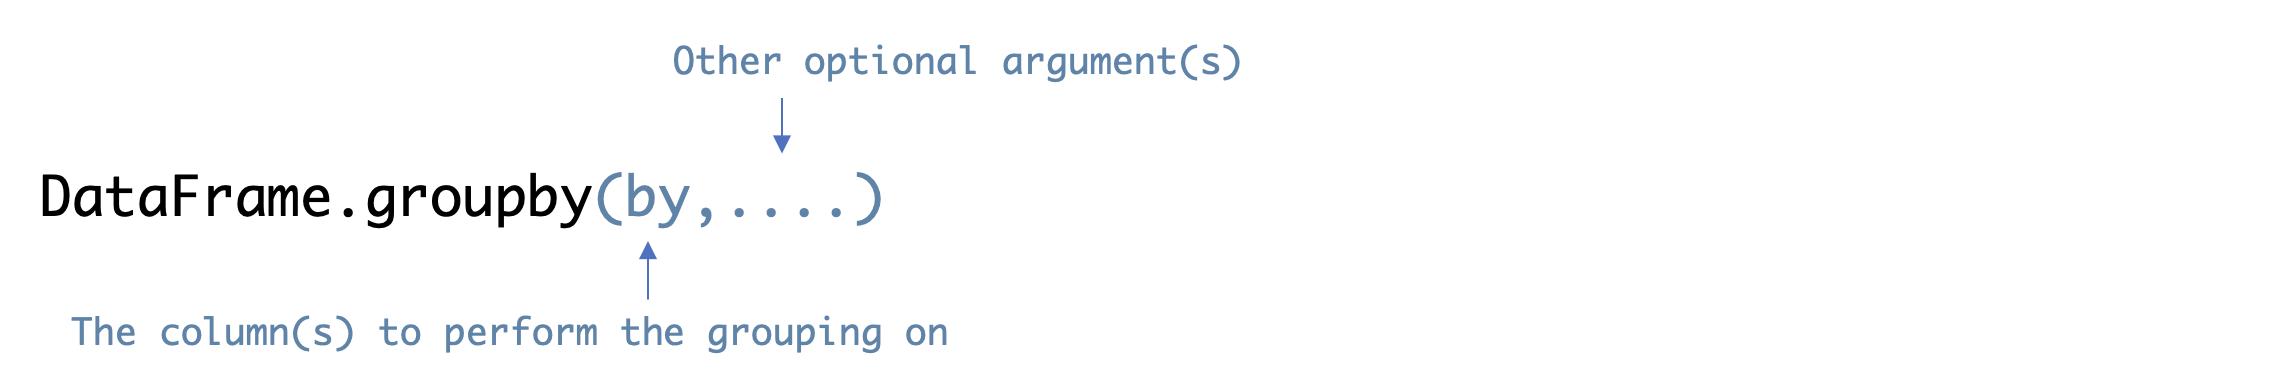

In [15]:
# groupby on 'Region', 'sum' aggregation
countries_df.groupby(by='Region').sum()

,Rank
Region,
Africa,7
Americas,19
Asia,20
Europe,9


In [16]:
# groupby on 'Region' and 'Population', 'min' aggregation
countries_df[['Region','Population']].groupby(by='Region').min()

,Population
Region,
Africa,"211,401,000"
Americas,"126,014,024"
Asia,"1,386,946,912"
Europe,"146,171,015"


In [17]:
countries_df

,Rank,Country,Region,Sub Region,Population
0,1,China,Asia,Eastern Asia,"1,412,600,000"
1,2,India,Asia,Southern Asia,"1,386,946,912"
2,3,United States,Americas,Northern America,"333,073,186"
3,4,Indonesia[b],Asia,Southeast Asia,"271,350,000"
4,5,Pakistan,Asia,Southern Asia,"225,200,000"
5,6,Brazil,Americas,Southern America,"214,231,641"
6,7,Nigeria,Africa,Western Africa,"211,401,000"
7,8,Bangladesh,Asia,Southern Asia,"172,062,576"
8,9,Russia[b],Europe,Eastern Europe,"146,171,015"
9,10,Mexico,Americas,Central America,"126,014,024"


In [18]:
# groupby on 'Region' and 'Sub Region' 'sum' aggregation. DataFrame pre filtered to include only 3 columns
countries_df[['Region','Sub Region','Population']].groupby(by=['Region', 'Sub Region']).sum()

Population
Region   Sub Region                                           
Africa   Western Africa                            211,401,000
Americas Central America                           126,014,024
         Northern America                          333,073,186
         Southern America                          214,231,641
Asia     Eastern Asia                            1,412,600,000
         Southeast Asia                            271,350,000
         Southern Asia     1,386,946,912225,200,000172,062,576
Europe   Eastern Europe                            146,171,015

In [19]:
# The agg method can accept and apply multiple aggregation functions
countries_df[['Region','Sub Region','Population']].groupby(by=['Region', 'Sub Region']).agg([sum,max])

Population               
                                                           sum            max
Region   Sub Region                                                          
Africa   Western Africa                            211,401,000    211,401,000
Americas Central America                           126,014,024    126,014,024
         Northern America                          333,073,186    333,073,186
         Southern America                          214,231,641    214,231,641
Asia     Eastern Asia                            1,412,600,000  1,412,600,000
         Southeast Asia                            271,350,000    271,350,000
         Southern Asia     1,386,946,912225,200,000172,062,576    225,200,000
Europe   Eastern Europe                            146,171,015    146,171,015

In [20]:
countries_df

,Rank,Country,Region,Sub Region,Population
0,1,China,Asia,Eastern Asia,"1,412,600,000"
1,2,India,Asia,Southern Asia,"1,386,946,912"
2,3,United States,Americas,Northern America,"333,073,186"
3,4,Indonesia[b],Asia,Southeast Asia,"271,350,000"
4,5,Pakistan,Asia,Southern Asia,"225,200,000"
5,6,Brazil,Americas,Southern America,"214,231,641"
6,7,Nigeria,Africa,Western Africa,"211,401,000"
7,8,Bangladesh,Asia,Southern Asia,"172,062,576"
8,9,Russia[b],Europe,Eastern Europe,"146,171,015"
9,10,Mexico,Americas,Central America,"126,014,024"


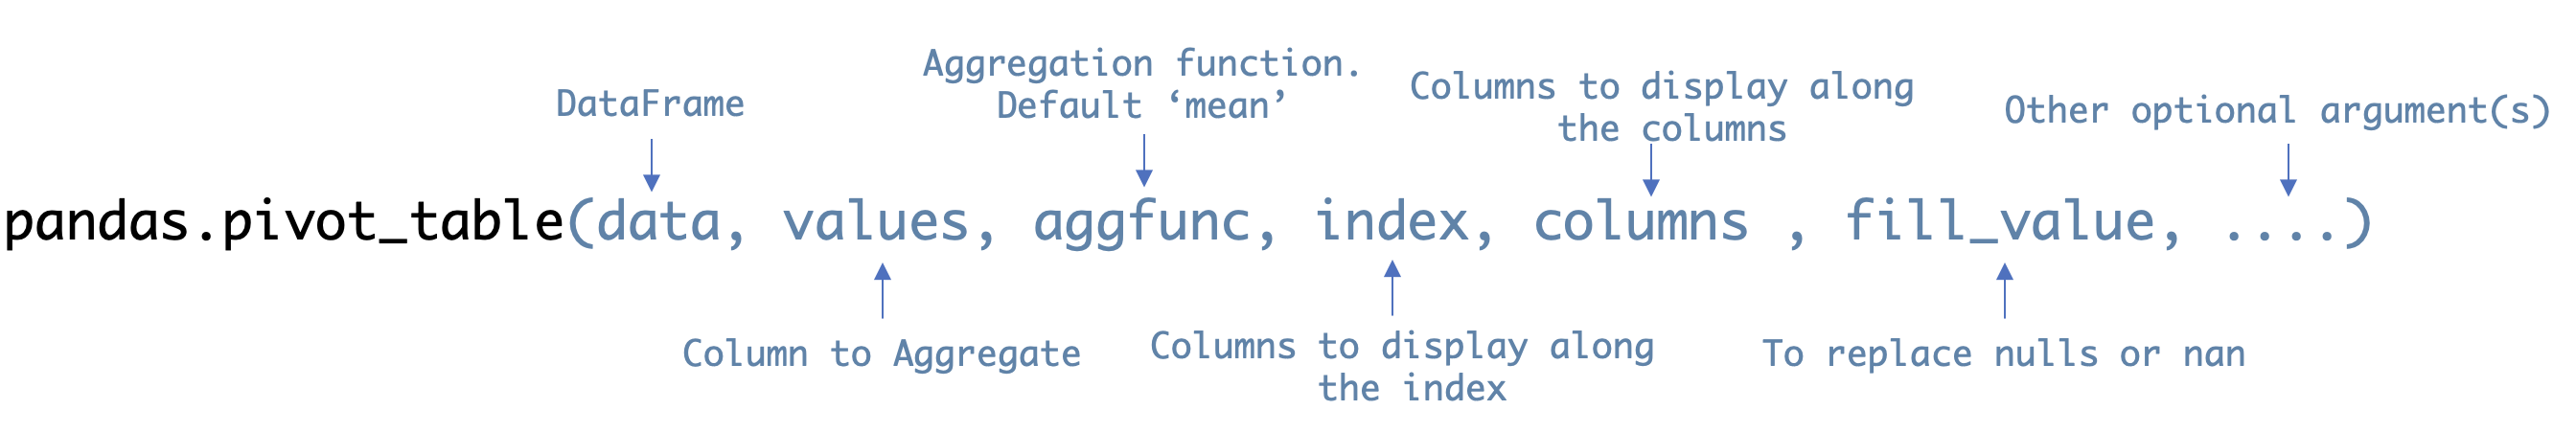

In [21]:
# pivot table with 'Country' as index and 'Sub Region' as column headers. Sum on 'Population'
pd.pivot_table(data=countries_df, index='Country',values='Population', columns='Sub Region', aggfunc=sum, fill_value=0)

Sub Region,Central America,Eastern Asia,Eastern Europe,Northern America,Southeast Asia,Southern America,Southern Asia,Western Africa
Country,,,,,,,,
Bangladesh,0,0,0,0,0,0,"172,062,576",0
Brazil,0,0,0,0,0,"214,231,641",0,0
China,0,"1,412,600,000",0,0,0,0,0,0
India,0,0,0,0,0,0,"1,386,946,912",0
Indonesia[b],0,0,0,0,"271,350,000",0,0,0
Mexico,"126,014,024",0,0,0,0,0,0,0
Nigeria,0,0,0,0,0,0,0,"211,401,000"
Pakistan,0,0,0,0,0,0,"225,200,000",0
Russia[b],0,0,"146,171,015",0,0,0,0,0


In [22]:
# This is the equivalent of a groupby on the 'Region' and 'Sub Region' columns
countries_df.pivot_table(index=['Region', 'Sub Region'], values='Population', aggfunc=sum)

Population
Region   Sub Region                                           
Africa   Western Africa                            211,401,000
Americas Central America                           126,014,024
         Northern America                          333,073,186
         Southern America                          214,231,641
Asia     Eastern Asia                            1,412,600,000
         Southeast Asia                            271,350,000
         Southern Asia     1,386,946,912225,200,000172,062,576
Europe   Eastern Europe                            146,171,015

## Links and resources:
* groupby: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
* split-apply-combine: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html
* aggregate: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html
* pivot_table: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html 